In [1]:
import numpy
import csv
import re
import pandas as pd
b = '../Data/'
path_value = b + r"data - eurusd.csv"

In [2]:
import warnings
warnings.filterwarnings("default")

In [3]:
a = pd.ExcelFile(b + "currencies_fixed_4.xlsx")
tables = []
for sheet in a.sheet_names:
    tables.append(pd.read_excel(b + "currencies_fixed_4.xlsx", sheet))

In [4]:
result_table = pd.concat(tables)

In [83]:
text = 'Text EN'

In [6]:
result_table

,№,Currency,Author,Author ID,Publication Date (RU),Publication Time (RU),DateTime (RU),Link RU,Title RU,Text RU,Recommendations RU,Publication Date (EN),Publication Time (EN),DateTime (EN),Link EN,Title EN,Text EN,Recommendations EN\n,Nearest Closing Time,Closing Value
0,0,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,18.07.19,07:41,201907180741,https://www.instaforex.com/forex_analysis/147884,"Analysis of AUD/JPY for July 18, 2019: AUD to ...",The Australian dollar started the week with we...,-\n,201907180741,7569
1,1,AUDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,16.05.19,08:49,201905160849,https://www.instaforex.com/forex_analysis/142903,AUDJPY: AUD to regain momentum over JPY for sh...,AUD is struggling to gain momentum over JPY re...,-\n,201905160849,7569
2,2,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,19.04.19,06:01,201904190601,https://www.instaforex.com/forex_analysis/140750,"Fundamental Analysis of AUD/JPY for April 19, ...",AUD/JPY has been rejected off the 80.50 resist...,-\n,201904190601,8000
3,3,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,11.04.19,12:49,201904111249,https://www.instaforex.com/forex_analysis/140128,"Fundamental Analysis of AUD/JPY for April 11, ...",The Australian economy is currently going thro...,-\n,201904111249,7951
4,4,AUDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,29.03.19,11:48,201903291148,https://www.instaforex.com/forex_analysis/139053,AUDJPY consolidates as both economies struggle,The Australian economy is experiencing a decl...,-\n,201903291148,7854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,06.06.17,11:28,201706061128,https://www.instaforex.com/forex_analysis/92601,"Fundamental Analysis of USDJPY for June 6, 2017",After rejecting off the resistance of 111.60 r...,-\n,201706061128,10963
195,195,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,08.05.17,14:32,201705081432,https://www.instaforex.com/forex_analysis/91448,"Fundamental Analysis of USDJPY for May 8, 2017",USD/JPY has been in a bullish non-volatile tre...,-\n,201705081432,11261
196,196,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,26.04.17,17:13,201704261713,https://www.instaforex.com/forex_analysis/90996,"USDJPY Fundamental Analysis April 26, 2017",USDJPY has been in a bullish trend since the s...,-\n,201704261713,11151
197,197,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,10.03.17,06:00,201703100600,https://www.instaforex.com/forex_analysis/89088,"USDJPY Fundamental Analysis March 10, 2017",USD/JPY has shown a good amount of strength re...,-\n,201703100600,11518


In [173]:
d = result_table[(result_table[text] != '-') & (result_table['Recommendations EN\n'] != '-\n')]

In [175]:
x = d[[text, 'Recommendations EN\n']]
x

,Text EN,Recommendations EN\n
4,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair has started a new round of do...
5,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair has started a new round of do...
7,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair has started a new round of do...
10,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair started an upward movement an...
13,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair has started a round of correc...
...,...,...
607,"""4-hour timeframe Technical data:The upper ch...",The GBP/USD currency pair continues to trade n...
609,"""4-hour timeframe Technical data: The upper c...",The GBP/USD pair continues to trade inside the...
610,"""4-hour timeframe Technical data: The upper c...",The GBP/USD currency pair continues to trade s...
622,"""4-hour timeframe Technical data:The upper ch...","""The GBP/USD currency pair continues to move s..."


In [176]:
def label_data(x):
    patterns = {'buy orders should be': -1,
                'sell orders should be': 1,
                'it is recommended to buy': -2,
                'it is recommended to sell': 2,
               'it is recommended to consider buying': -2,
                'it is recommended to consider selling': 2,
                'you can return to sell': 1,
                'you can return to buy': -1,
                'it is recommended to return to buying': -2,
                'it is recommended to return to selling': 2,
                'it is recommended to open new sell orders': 2,
                'it is recommended to open new buy orders': -2,
                'it is recommended to consider sell orders': 2,
                'it is recommended to consider buy orders': -2,
                'It is recommended to consider short positions': 2,
                'It is recommended to consider long positions': -2,
                'Buy orders are recommended': -2,
                'Sell orders are recommended': 2,
                'It is also recommended to consider buying': -2,
                'It is also recommended to consider selling': 2,
                'purchases of the pair will be': -1,
                'sales of the pair will be': 1,
                'Sales of the pair are possible now': 1,
                "purchases of the pair are possible now": -1,
                'The sale of the pair will be possible': 1,
                "It is recommended to open buy orders": -2,
                "It is recommended to open sell orders": 2,
                "it is now recommended to open buy orders": -2,
                "it is now recommended to open sell orders": 2,
                "It is recommended to re-consider options for opening long positions": -1,
                "It is recommended to re-consider options for opening short positions": 1,
                "You will not be able to buy": -1,
                "You will not be able to sell": 1,
                "You can sell the pair": 1,
                "You can buy the pair": -1,
                "You can purchase the pair": -1,
                "It will be possible to return to sell positions": 1,
                "It will be possible to return to buy positions": -1,
                "Short positions can be considered": 1,
                "Long positions can be considered": -1
               }
    cnt = 0
    labels = [0] * len(x)
    for i, text in enumerate(x['Recommendations EN\n']):
        for pattern in patterns:
            if pattern.lower() in '. '.join(text.lower().split('. ')[-5:][::-1]):
                cnt += 1
                labels[i] = patterns[pattern]
                break
    print(f'Found {cnt} texts to label')
    y = x.copy()
    y['labels'] = labels
    return y 

In [93]:
text = 'Text EN'
target = 'labels'
labeled_data = y[[text, target]]

In [25]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
transformation_dictionary = {}
snowball = SnowballStemmer(language="english")
def apply_tokenizing(t):
    text = re.sub('[^A-Za-z ]', " ", t).lower()
    tokenized = word_tokenize(text, language="english")
    stops = stopwords.words("english")
    filtered_tokens = []
    for token in tokenized:
        if token not in stops:
            filtered_tokens += [token]
    return " ".join(filtered_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andrei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
final_data = labeled_data[text].apply(apply_tokenizing)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [ ]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install accelerate -U

In [20]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
# model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [30]:
final_data = final_data.drop_duplicates(text)
final_data_without_na = final_data[final_data[target].notna()]

In [31]:
final_data_without_na.shape

(692, 2)

In [32]:
labels_mapper = {
    -2: 0,
    -1: 1,
    0: 2,
    1: 3,
    2: 4
}

def map_labels(x):
    return labels_mapper[x]

In [33]:
final_data_without_na['labels']

4     -1
5     -1
7     -1
10     1
13    -1
      ..
607    0
609    0
610    0
622    0
624    0
Name: labels, Length: 692, dtype: int64

In [34]:
final_data_without_na['labels'] = final_data_without_na['labels'].apply(map_labels)
final_data_without_na['labels'].value_counts()

4    203
0    194
2    164
3     73
1     58
Name: labels, dtype: int64

In [35]:
X, y = final_data_without_na[text], final_data_without_na[target]

In [44]:
# !pip install datasets
# !pip install evaluate
# !pip install accelerate -U

In [46]:
import torch
from datasets import Dataset
import numpy as np
import evaluate
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer)
from tqdm.auto import tqdm
from torch.optim import AdamW
from torch.utils.data import DataLoader
# for param in model.parameters(): # transfer learning
#     param.requires_grad = False
num_of_out_classes = 5
sentiment_predictor = torch.nn.Linear(model.classifier.in_features, num_of_out_classes)
model.classifier = sentiment_predictor
model.num_labels = num_of_out_classes
device = "cpu"
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(model.parameters(), lr=5e-6, betas=(0.9, 0.999))

def tokenize(text):
    return tokenizer(text['Text EN'], padding='max_length', truncation=True, return_tensors='pt')

def preprocess(dataset):
    data = Dataset.from_pandas(dataset.set_index(text))
    data = data.map(tokenize)
    data = data.remove_columns(['Text EN'])
    data.set_format('torch')
    return data


train, test = train_test_split(final_data_without_na, test_size=0.15)
train = preprocess(train)
test = preprocess(test)

train_dataloader = DataLoader(train, shuffle=True, batch_size=8)
test_dataloader = DataLoader(test, batch_size=8)

num_epochs = 20
num_training_steps = num_epochs * len(train_dataloader)

Map:   0%|          | 0/588 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [47]:
torch.cuda.empty_cache()

In [48]:
from transformers import get_scheduler
lr_scheduler = get_scheduler(
	name = 'linear',
	optimizer = optimizer,
	num_warmup_steps = 0,
	num_training_steps = num_training_steps)

def preprocess_batch(batch):
    for key in batch:
        if len(batch[key].shape) > 1 and batch[key].shape[1] == 1:
            batch[key] = batch[key].squeeze(1)
    for key in batch:
        batch[key] = batch[key].to(device)

for epoch in tqdm(range(num_epochs)):
    model.train()
    for batch in tqdm(train_dataloader, leave=False):
        preprocess_batch(batch)
        # print(list(map(lambda x: x[1].shape, batch.items())))
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

    metric = evaluate.load('f1')

    model.eval()
    for batch in tqdm(test_dataloader, leave=False):
        preprocess_batch(batch)
        with torch.no_grad():
            outputs = model(**batch)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        metric.add_batch(predictions=predictions, references=batch['labels'])

    print(f'epoch {epoch} -', metric.compute())

model.save_pretrained('./')

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [36]:
def make_prediction(text):
    batch = tokenizer(text, padding='max_length', truncation=True, return_tensors='pt')
    preprocess_batch(batch)
    with torch.inference_mode():
        answer = model(**batch).logits
    return torch.argmax(answer, dim=-1)

make_prediction("")

NameError: name 'tokenizer' is not defined

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=1)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv_bigram, cv_word = CountVectorizer(ngram_range=(2,3)), CountVectorizer(ngram_range=(1,2))
tfid_bigram, tfid_word = TfidfVectorizer(ngram_range=(2, 3)), TfidfVectorizer(ngram_range=(1, 2))

X, X1, X_cv_bigram, X_cv_word = tfid_bigram.fit_transform(x_train), tfid_word.fit_transform(x_train), cv_bigram.fit_transform(x_train), cv_word.fit_transform(x_train)
X_test, X_test1, X_test_cv_bigram, X_test_cv_word = tfid_bigram.transform(x_valid), tfid_word.transform(x_valid), cv_bigram.transform(x_valid), cv_word.transform(x_valid)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import f1_score
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
param_grid = {

        'SGD__alpha': np.logspace(-3, 2, num=5)
}

crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', SGDClassifier(n_jobs=-1))]),
             param_grid={'SGD__alpha': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02])},
             scoring=make_scorer(f1_score, average=macro))

In [42]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.6643486019872652,
 {'SGD__alpha': 0.001},
 0.5393387830734646,
 {'SGD__alpha': 0.001},
 0.6643486019872652,
 {'SGD__alpha': 0.31622776601683794},
 0.7120229960142888,
 {'SGD__alpha': 0.31622776601683794})

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGDClassifier(alpha=0.001, n_jobs=1, random_state=12), X_test_cv_bigram, y_valid, cv=5)

array([0.66666667, 0.66666667, 0.71428571, 0.71428571, 0.75      ])

# SGD

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
best = SGDClassifier(alpha = crs.best_params_['SGD__alpha'])
best1 = SGDClassifier(alpha = crs1.best_params_['SGD__alpha'], random_state=12)
best2 = SGDClassifier(alpha = crs2.best_params_['SGD__alpha'], random_state=12)
best3 = SGDClassifier(alpha = crs3.best_params_['SGD__alpha'], random_state=12)
best.fit(X, y_train), best1.fit(X1, y_train), best2.fit(X_cv_bigram, y_train), best3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(best.predict(X_test), y_valid, average="macro")}')
print(f'TF-IDF word {f1_score(best1.predict(X_test1), y_valid, average="macro")}')
print(f'CountVectorizer bigram {f1_score(best2.predict(X_test_cv_bigram), y_valid, average="macro")}')
print(f'CountVectorizer word {f1_score(best3.predict(X_test_cv_word), y_valid, average="macro")}')

TF-IDF bigram 0.7689822755860491
TF-IDF word 0.7626618937529519
CountVectorizer bigram 0.8404929074949197
CountVectorizer word 0.8185901151988106


In [45]:
print(f'TF-IDF bigram {accuracy_score(best.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(best1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(best2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(best3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8269230769230769
TF-IDF word 0.7788461538461539
CountVectorizer bigram 0.8846153846153846
CountVectorizer word 0.8365384615384616


# SVC

In [46]:
from sklearn.svm import LinearSVC
text = 'Text EN'
target = 'labels'
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', LinearSVC())])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', LinearSVC())])
param_grid = {

        'SGD__C': [ 10 ** i for i in range(-5, 3) ]
}
crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\

C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\

C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\

C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', LinearSVC())]),
             param_grid={'SGD__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                    100]},
             scoring=make_scorer(f1_score, average=macro))

In [47]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.6800569887046133,
 {'SGD__C': 100},
 0.5429185309645601,
 {'SGD__C': 10},
 0.6800569887046133,
 {'SGD__C': 0.01},
 0.719214120941758,
 {'SGD__C': 1})

In [48]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=crs.best_params_['SGD__C'])
svc1 = LinearSVC(C=crs.best_params_['SGD__C'])
svc2 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc3 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc.fit(X, y_train), svc1.fit(X1, y_train), svc2.fit(X_cv_bigram, y_train), svc3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(svc.predict(X_test), y_valid, average="macro")}')
print(f'TF-IDF word {f1_score(svc1.predict(X_test1), y_valid, average="macro")}')
print(f'CountVectorizer bigram {f1_score(svc2.predict(X_test_cv_bigram), y_valid, average="macro")}')
print(f'CountVectorizer word {f1_score(svc3.predict(X_test_cv_word), y_valid, average="macro")}')

C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Andrei\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


TF-IDF bigram 0.7827767419892112
TF-IDF word 0.7636807323552186
CountVectorizer bigram 0.8752694924123496
CountVectorizer word 0.7516984975808505


In [49]:
print(f'TF-IDF bigram {accuracy_score(svc.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(svc1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(svc2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(svc3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8365384615384616
TF-IDF word 0.7692307692307693
CountVectorizer bigram 0.9038461538461539
CountVectorizer word 0.7788461538461539


# CATBOOST

In [44]:
!pip install catboost

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1d55dee38c0>
C:\Users\Andrei\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\Andrei\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\Andrei\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [50]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(silent=True)
cat1 = CatBoostClassifier(silent=True)
cat2 = CatBoostClassifier(silent=True)
cat3 = CatBoostClassifier(silent=True)
cat.fit(X, y_train), cat1.fit(X1, y_train), cat2.fit(X_cv_bigram, y_train), cat3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(cat.predict(X_test), y_valid, average="macro")}')
print(f'TF-IDF word {f1_score(cat1.predict(X_test1), y_valid, average="macro")}')
print(f'CountVectorizer bigram {f1_score(cat2.predict(X_test_cv_bigram), y_valid, average="macro")}')
print(f'CountVectorizer word {f1_score(cat3.predict(X_test_cv_word), y_valid, average="macro")}')

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


TF-IDF bigram 0.9316875954853462
TF-IDF word 0.9453211406402897
CountVectorizer bigram 0.9368437476000502
CountVectorizer word 0.9642380952380952


In [51]:
print(f'TF-IDF bigram {accuracy_score(cat.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(cat1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(cat2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(cat3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.9326923076923077
TF-IDF word 0.9326923076923077
CountVectorizer bigram 0.9423076923076923
CountVectorizer word 0.9519230769230769


# RANDOM FOREST

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500)
rf1 = RandomForestClassifier(500)
rf2 = RandomForestClassifier(500)
rf3 = RandomForestClassifier(500)
rf.fit(X, y_train), rf1.fit(X1, y_train), rf2.fit(X_cv_bigram, y_train), rf3.fit(X_cv_word, y_train)

(RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=500))

In [53]:
print(f'TF-IDF bigram {f1_score(rf.predict(X_test), y_valid, average="macro")}')
print(f'TF-IDF word {f1_score(rf1.predict(X_test1), y_valid, average="macro")}')
print(f'CountVectorizer bigram {f1_score(rf2.predict(X_test_cv_bigram), y_valid, average="macro")}')
print(f'CountVectorizer word {f1_score(rf3.predict(X_test_cv_word), y_valid, average="macro")}')

TF-IDF bigram 0.7180627167194331
TF-IDF word 0.6241023428685206
CountVectorizer bigram 0.7754381083298229
CountVectorizer word 0.7233473193473193


In [54]:
print(f'TF-IDF bigram {accuracy_score(rf.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(rf1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(rf2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(rf3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.7788461538461539
TF-IDF word 0.7403846153846154
CountVectorizer bigram 0.8173076923076923
CountVectorizer word 0.7884615384615384


# Оценка качества работы моделей

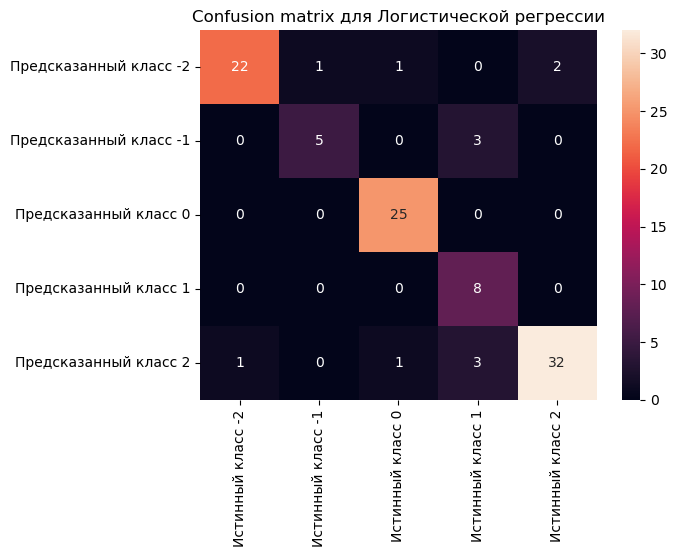

In [55]:
best_models = [(best2, 'Логистической регрессии'), (svc2, 'Метода опорных векторов'), (cat2, 'Градиентного бустинга'), (rf2, 'Случайного леса')]
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
grades = [-2, -1, 0, 1, 2]
def estimate(best2, name):
    plt.title(f'Confusion matrix для {name}')
    sns.heatmap(pd.DataFrame(confusion_matrix(best2.predict(X_test_cv_bigram), y_valid.astype(np.int64)),\
                            columns=['Истинный класс ' + str(grade) for grade in grades], index=['Предсказанный класс ' + str(grade) for grade in grades]), annot=True, fmt='')
estimate(*best_models[0])

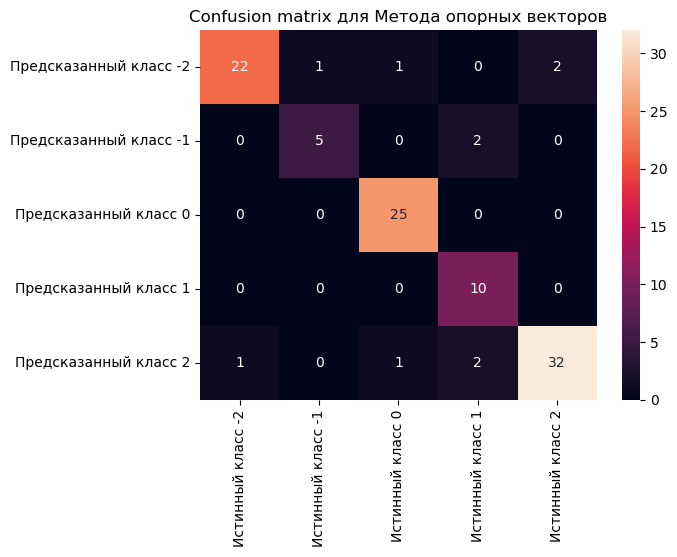

In [56]:
estimate(*best_models[1])

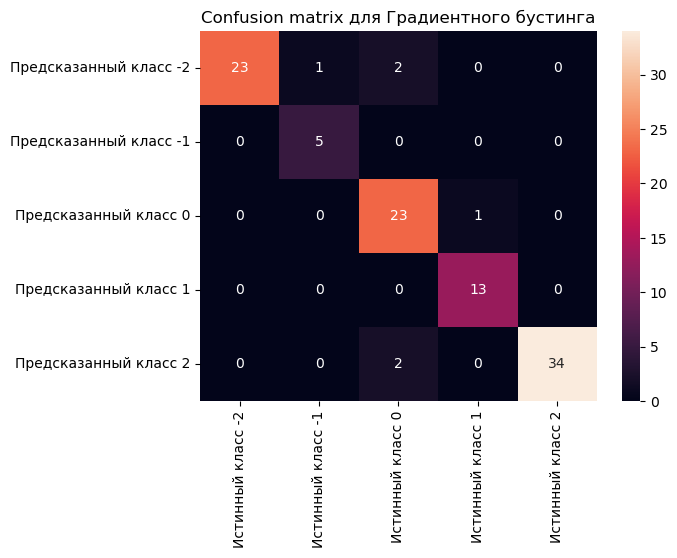

In [57]:
estimate(*best_models[2])

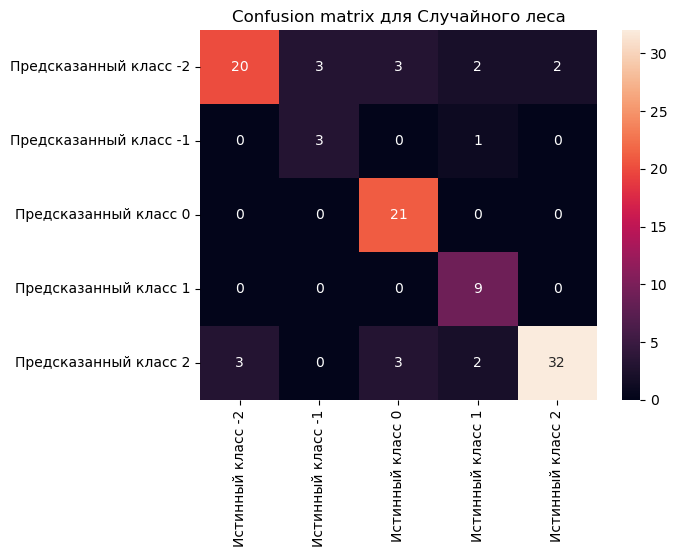

In [58]:
estimate(*best_models[3])

In [59]:
from sklearn.metrics import classification_report
def summarize(algo, name):
    print(f'Classification report для {name}')
    print(classification_report(algo.predict(X_test_cv_bigram), y_valid))

In [60]:
summarize(*best_models[0])

Classification report для Логистической регрессии
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.83      0.62      0.71         8
           2       0.93      1.00      0.96        25
           3       0.57      1.00      0.73         8
           4       0.94      0.86      0.90        37

    accuracy                           0.88       104
   macro avg       0.85      0.87      0.84       104
weighted avg       0.90      0.88      0.89       104



In [61]:
summarize(*best_models[1])

Classification report для Метода опорных векторов
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.83      0.71      0.77         7
           2       0.93      1.00      0.96        25
           3       0.71      1.00      0.83        10
           4       0.94      0.89      0.91        36

    accuracy                           0.90       104
   macro avg       0.87      0.89      0.88       104
weighted avg       0.91      0.90      0.90       104



In [62]:
summarize(*best_models[2])

Classification report для Градиентного бустинга
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.83      1.00      0.91         5
           2       0.85      0.96      0.90        24
           3       0.93      1.00      0.96        13
           4       1.00      0.94      0.97        36

    accuracy                           0.94       104
   macro avg       0.92      0.96      0.94       104
weighted avg       0.95      0.94      0.94       104



In [63]:
summarize(*best_models[3])

Classification report для Случайного леса
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.50      0.75      0.60         4
           2       0.78      1.00      0.88        21
           3       0.64      1.00      0.78         9
           4       0.94      0.80      0.86        40

    accuracy                           0.82       104
   macro avg       0.75      0.84      0.78       104
weighted avg       0.84      0.82      0.82       104



In [64]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_coefficients(classifier, feature_names, name, n_top_features=50, is_cb=False):
    coef = classifier.coef_.ravel() if not is_cb else classifier.get_feature_importance()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features] 
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    figure, axis = plt.subplots(1, 2, figsize=(20,15)) if not is_cb else plt.subplots(figsize=(20,15))
    axis[0].bar(np.arange(n_top_features), coef[positive_coefficients])
    axis[0].set_title(f"Топ {n_top_features} положительных слов в словаре эмоциональной окраски для {name}")
    if not is_cb:
        axis[1].bar(np.arange(n_top_features), abs(coef[negative_coefficients]))
        axis[1].set_title(f"Топ {n_top_features} негативных слов в словаре эмоциональной окраски для {name}")
    #axis[1].set_title(f"Топ 25 слов в словаре эмоциональной окраски для {name}")
    #plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    positive_coefficients %= len(feature_names)
    negative_coefficients %= len(feature_names)
    feature_names = np.array(feature_names)
    axis[0].set_xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[positive_coefficients],
        rotation=60,
        ha="right",
    );
    if not is_cb:
        axis[1].set_xticks(
            np.arange(1, 1 + n_top_features),
            feature_names[negative_coefficients],
            rotation=60,
            ha="right",
        );
    plt.show();

In [65]:
def visualize_catboost_coefficients(classifier, feature_names, name, n_top_features=50):
    coef = classifier.get_feature_importance()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    interesting_coefficients = positive_coefficients
    plt.figure(figsize=(15, 5))
    plt.bar(np.arange(n_top_features), coef[positive_coefficients])
    plt.title(f"Топ {n_top_features} важных {name} в словаре эмоциональной окраски")
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[positive_coefficients],
        rotation=60,
        ha="right",
    );

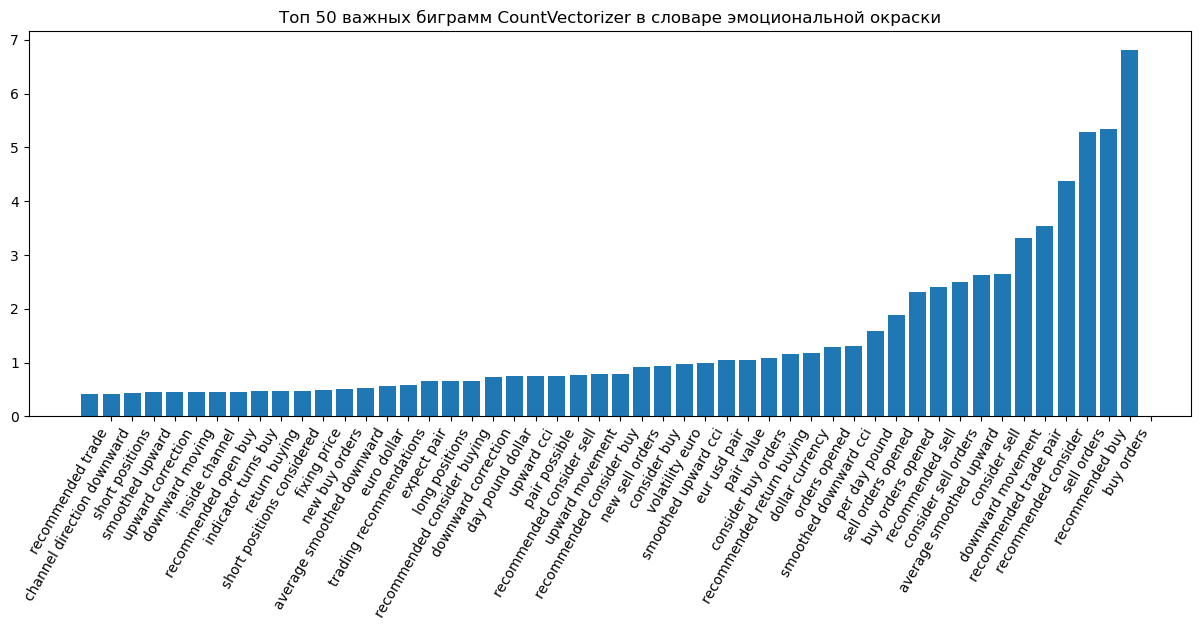

In [66]:
visualize_catboost_coefficients(cat2, cv_bigram.get_feature_names_out(), 'биграмм CountVectorizer')

<Figure size 1500x500 with 0 Axes>

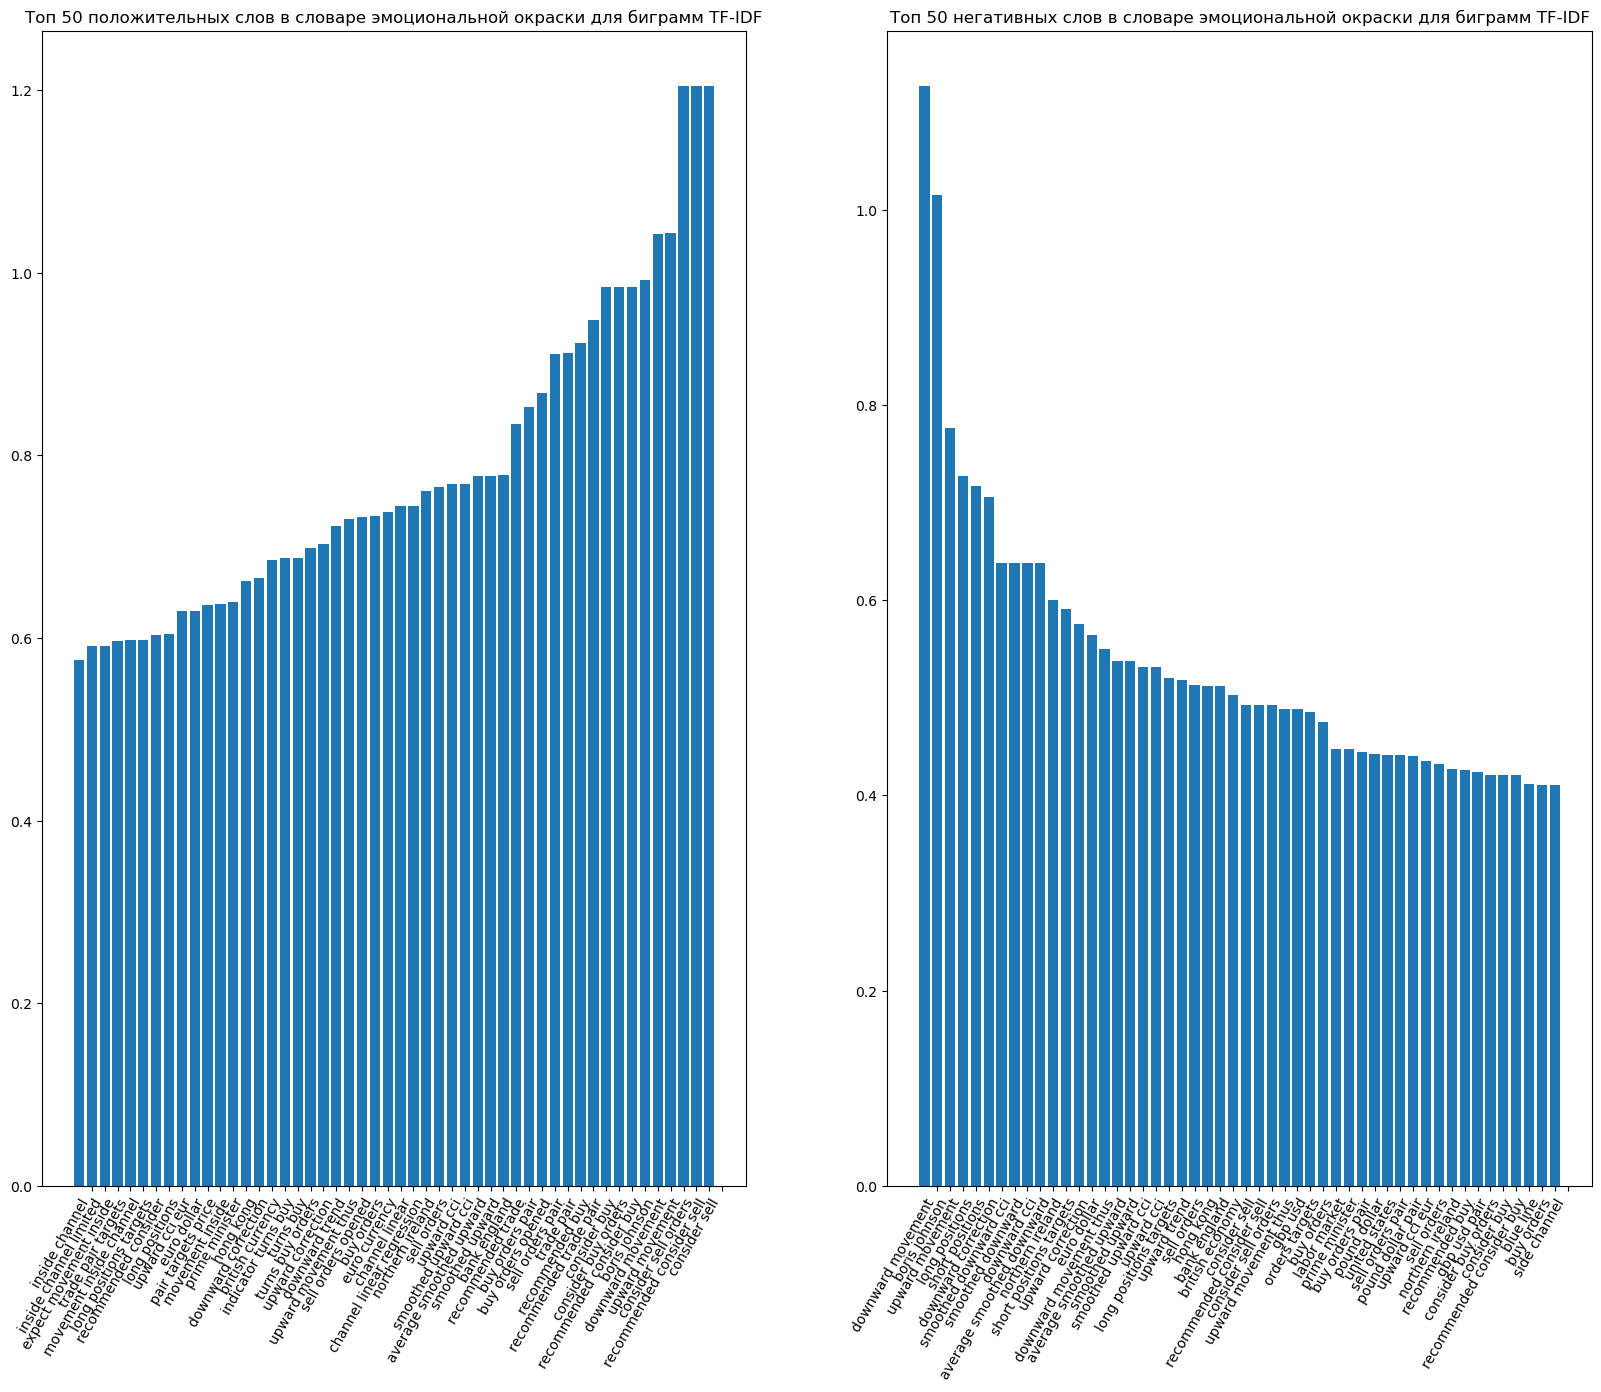

In [67]:
visualize_coefficients(best, tfid_bigram.get_feature_names_out(), 'биграмм TF-IDF')

<Figure size 1500x500 with 0 Axes>

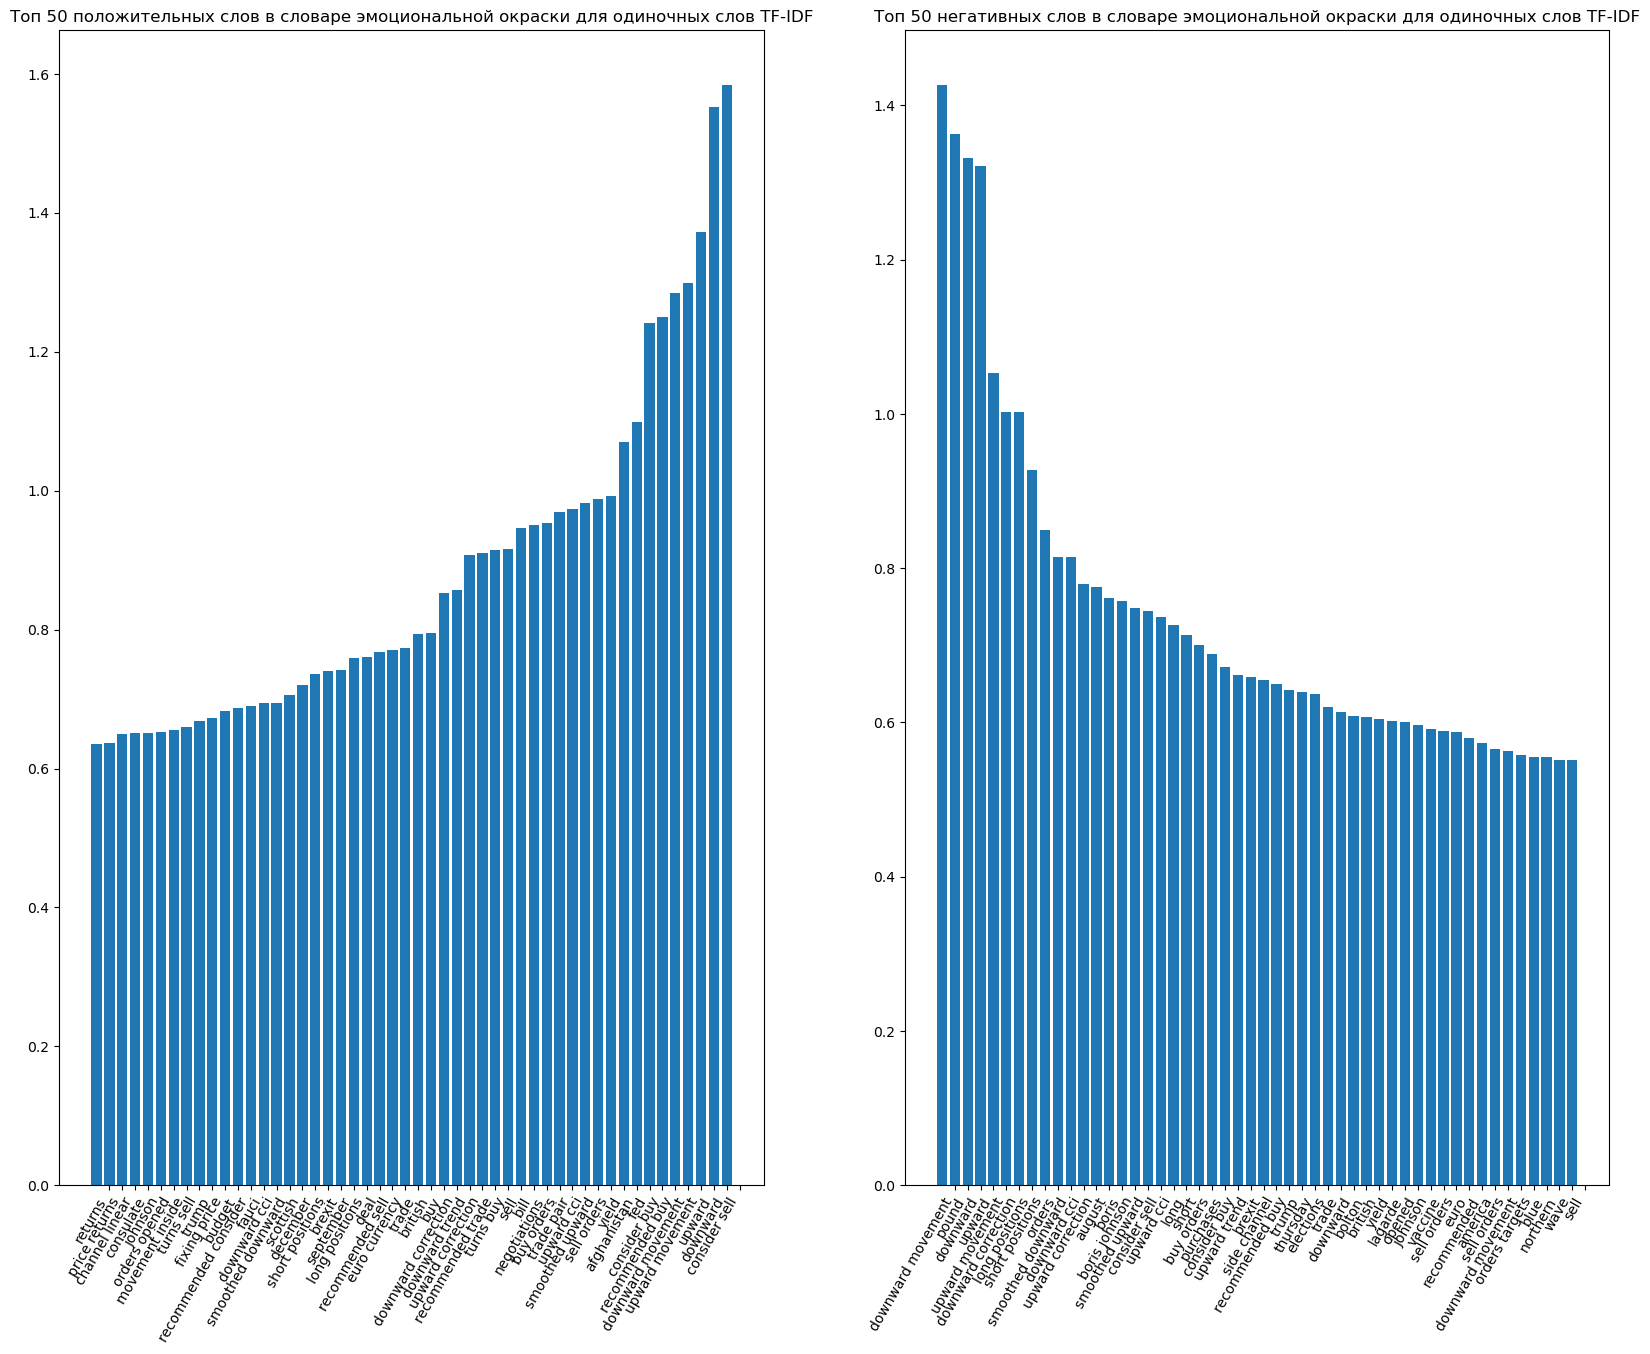

In [68]:
visualize_coefficients(best1, tfid_word.get_feature_names_out(), 'одиночных слов TF-IDF')

<Figure size 1500x500 with 0 Axes>

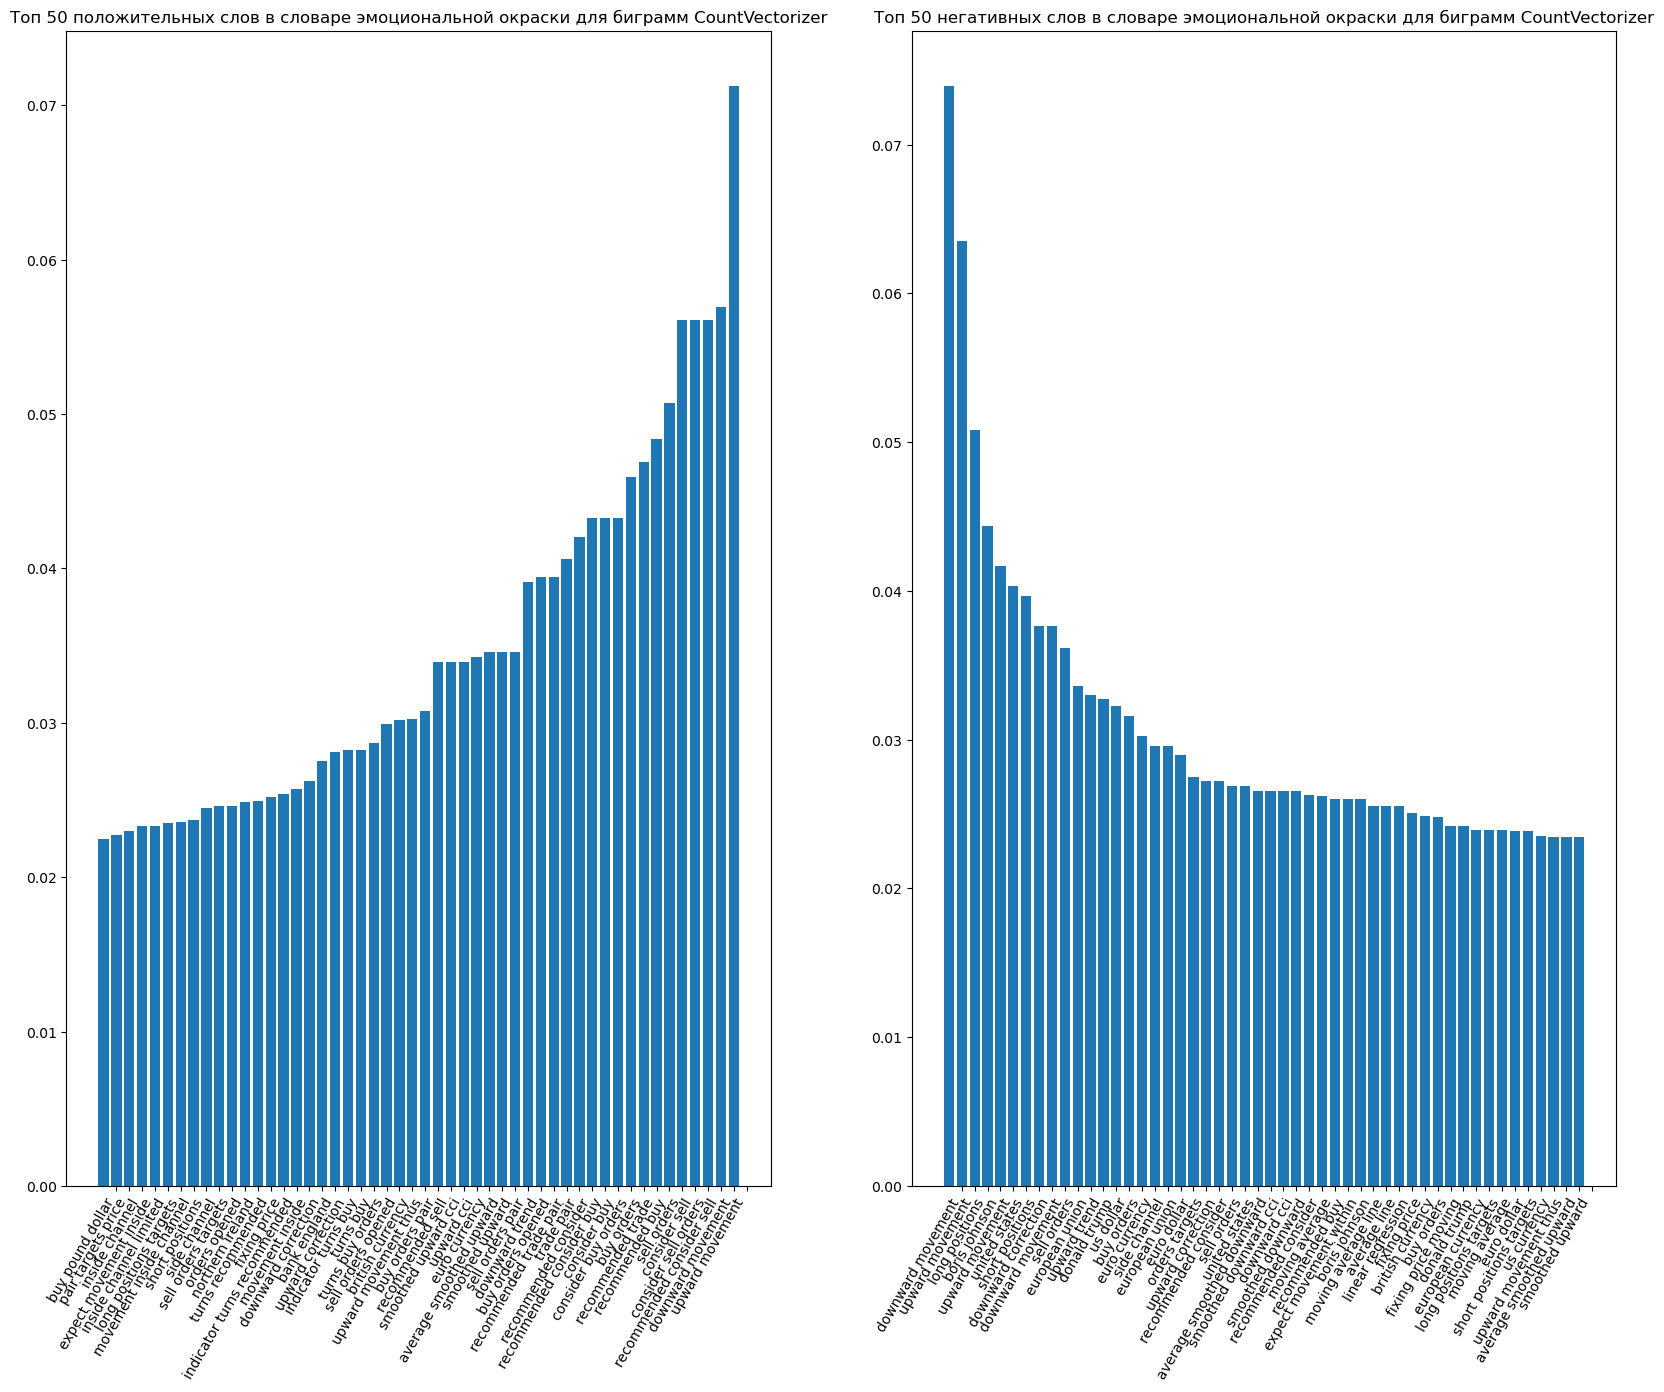

In [69]:
visualize_coefficients(best2, cv_bigram.get_feature_names_out(), 'биграмм CountVectorizer')

<Figure size 1500x500 with 0 Axes>

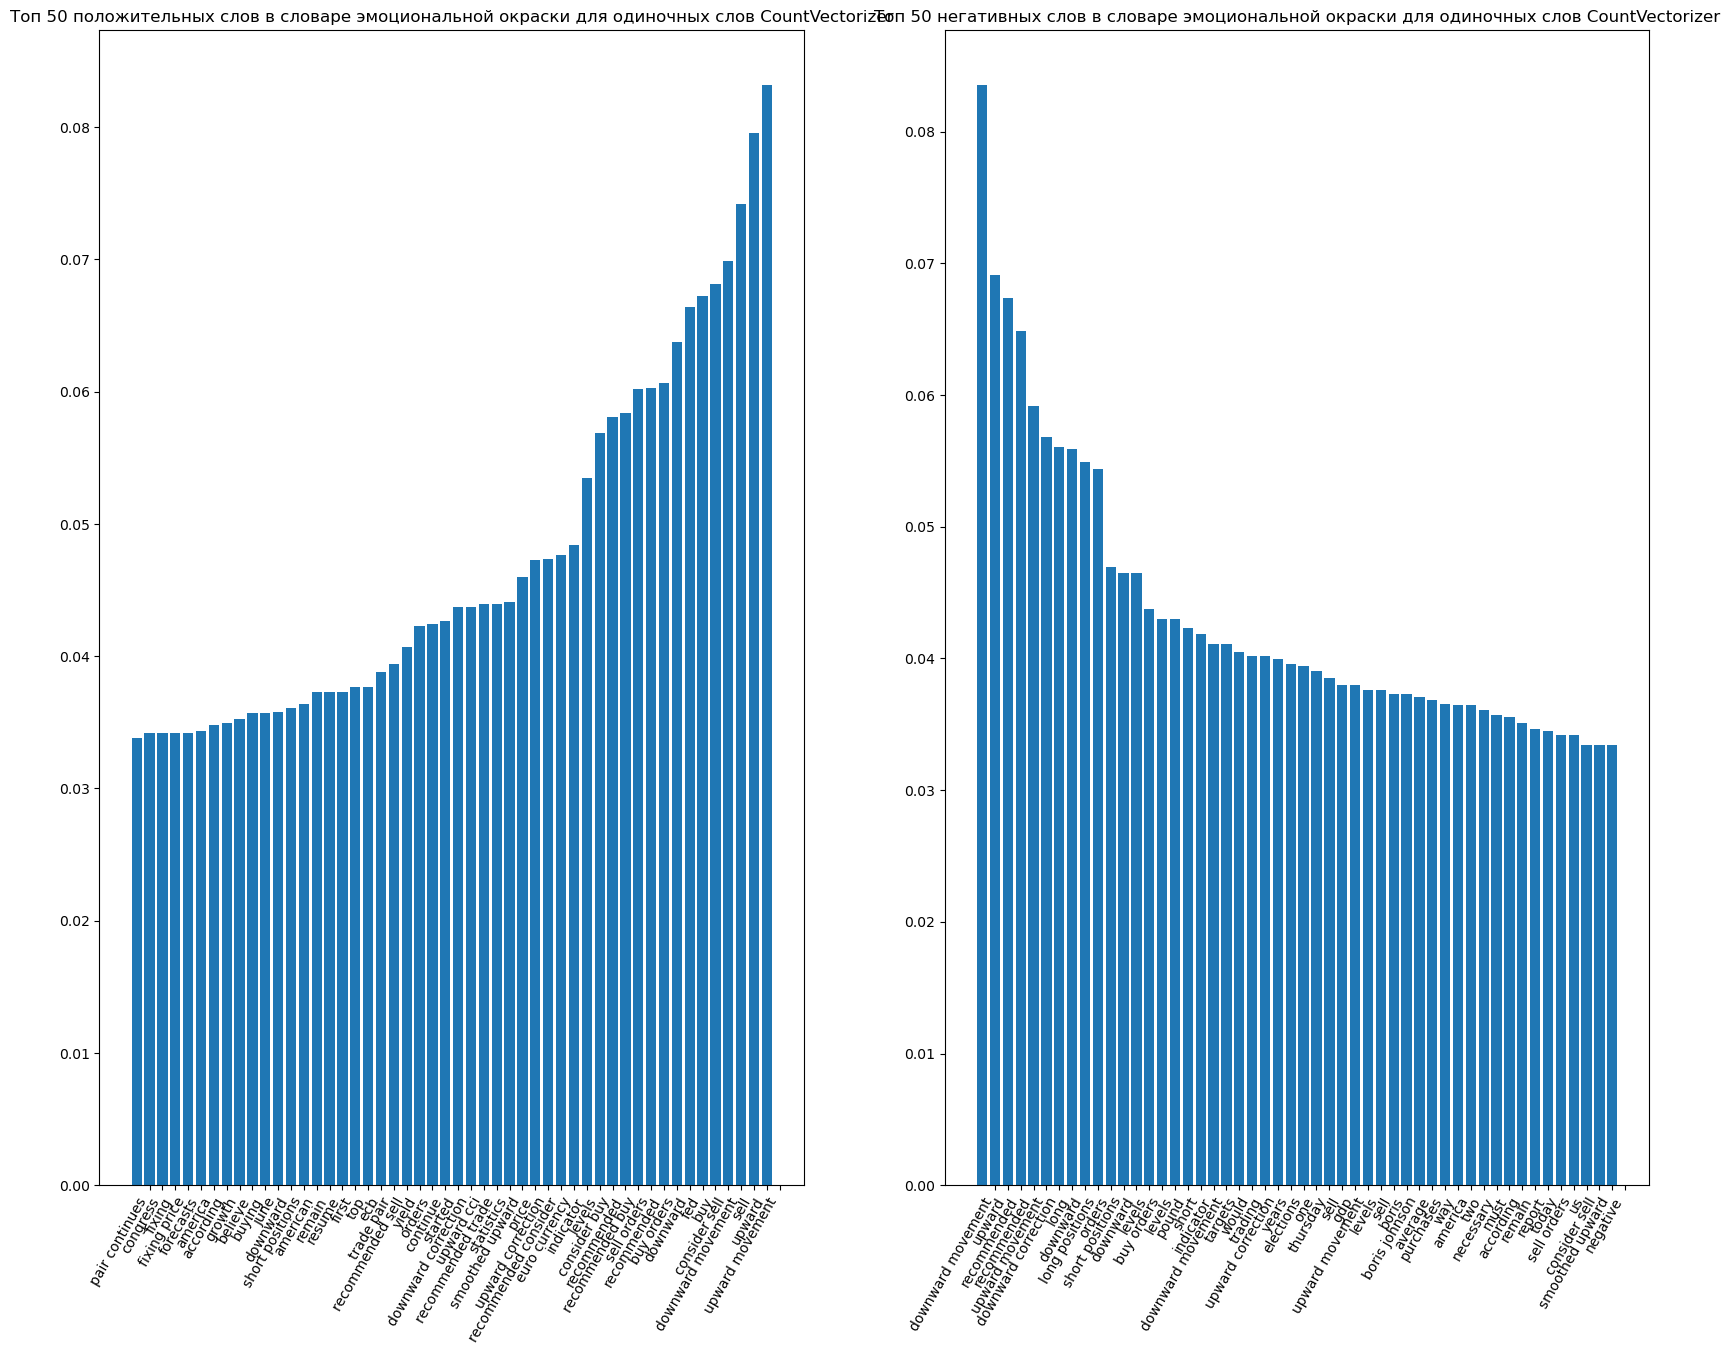

In [70]:
visualize_coefficients(best3, cv_word.get_feature_names_out(), 'одиночных слов CountVectorizer')

# Lexicon Based методы

## TextBlob

In [118]:
from textblob import TextBlob

def f(func, t):
    l = func(t).sentiment[0]
    if l < 0:
        return -1
    elif l > 0:
        return 1
    else:
        return 0

text_blob_predictions = labeled_data[text].apply(lambda t: f(TextBlob, t))

In [119]:
def make_new_labels(t):
    if t < 0:
        return -1
    elif t > 0:
        return 1 
    else:
        return 0 

d = labeled_data['labels'].apply(make_new_labels)
print(f'f1_score {f1_score(text_blob_predictions, d, average="macro")}'), print(f'accuracy {accuracy_score(text_blob_predictions, d)}');

f1_score 0.21842256974154517
accuracy 0.3985611510791367


## SentiWordNet

In [122]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def get_sentiment_score_of_review(sentence):
    # 1. Tokenize
    tokens = nltk.word_tokenize(sentence)

    lemmatizer = WordNetLemmatizer()

    sentiment_score = 0.0
    for word in tokens:
        tag = get_wordnet_pos(word)
        item_res = lemmatizer.lemmatize(word, tag)
        if not item_res:
            continue
        
        synsets = wordnet.synsets(item_res, pos=tag)
        if len(synsets) == 0:
            continue
        
        # Take the first, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
        
    return sentiment_score

swn_prediction = labeled_data[text].apply(lambda t: make_new_labels(get_sentiment_score_of_review(t)))

In [123]:
print(f'f1_score {f1_score(swn_prediction, d, average="macro")}'), print(f'accuracy {accuracy_score(swn_prediction, d)}');

f1_score 0.2863238420144339
accuracy 0.3726618705035971


## VADER

In [142]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import numpy as np
sia = SentimentIntensityAnalyzer()
def find_sentiment_vader(t, sia):
    g = sia.polarity_scores(t)
    map_sentiment = {
        'neg': -1,
        "neu": 0,
        "pos": 1
    }
    arr = []
    for key in map_sentiment:
        arr.append(g[key])
    return map_sentiment[list(map_sentiment.keys())[np.argmax(arr)]]
vader_prediction = labeled_data[text].apply(lambda t: find_sentiment_vader(t, sia))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Andrei\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [161]:
sia.polarity_scores("good bad")

{'neg': 0.547, 'neu': 0.0, 'pos': 0.453, 'compound': -0.1531}

In [148]:
print(f'f1_score {f1_score(vader_prediction, d, average="macro")}'), print(f'accuracy {accuracy_score(vader_prediction, d)}');

f1_score 0.12727978269305396
accuracy 0.23597122302158274
